## Sentiment Analysis Visualization

Now that we have sentiment scores, let's visualize the distribution across banks and ratings.

In [5]:
# Cell 1: Setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = [12, 6]

# Load the sentiment data
sentiment_df = pd.read_csv('data/bank_reviews_with_sentiment.csv')

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8796\265971757.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


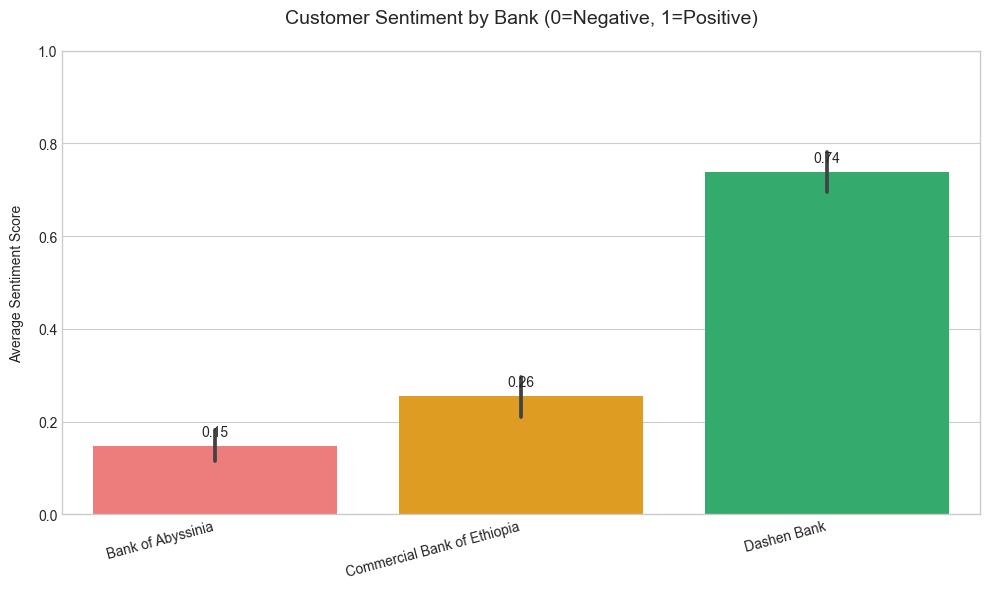

In [11]:
# Cell 2: Average Sentiment by Bank
plt.figure(figsize=(10,6))
ax = sns.barplot(data=sentiment_df, 
                x='bank', 
                y='sentiment_numeric',
                palette=['#ff6b6b', '#ffa502', '#20bf6b'],  # Red, Orange, Green
                order=['Bank of Abyssinia', 'Commercial Bank of Ethiopia', 'Dashen Bank'])

plt.title('Customer Sentiment by Bank (0=Negative, 1=Positive)', pad=20, fontsize=14)
plt.ylabel('Average Sentiment Score', labelpad=10)
plt.xlabel('')
plt.xticks(rotation=15, ha='right')
plt.ylim(0, 1)

# Add value labels
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.tight_layout()
plt.savefig('visualizations/sentiment_by_bank.png', dpi=300, bbox_inches='tight')
plt.show()

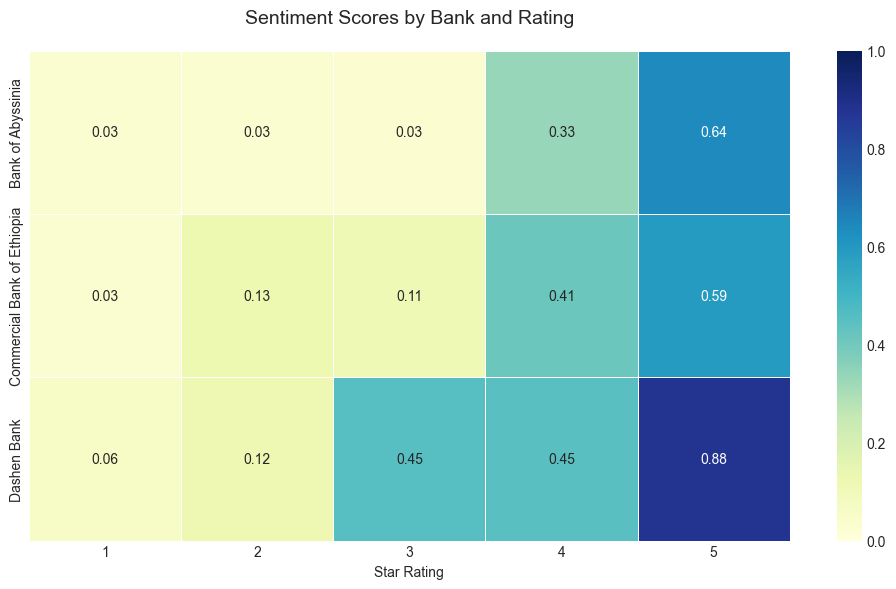

In [10]:
# Cell 3: Sentiment by Rating Heatmap
# Pivot the data for heatmap
heatmap_data = sentiment_df.groupby(['bank', 'rating'])['sentiment_numeric'].mean().unstack()

plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, 
            annot=True, 
            fmt=".2f",
            cmap="YlGnBu",
            linewidths=.5,
            vmin=0, 
            vmax=1)

plt.title('Sentiment Scores by Bank and Rating', pad=20, fontsize=14)
plt.ylabel('')
plt.xlabel('Star Rating')
plt.tight_layout()
plt.savefig('visualizations/sentiment_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

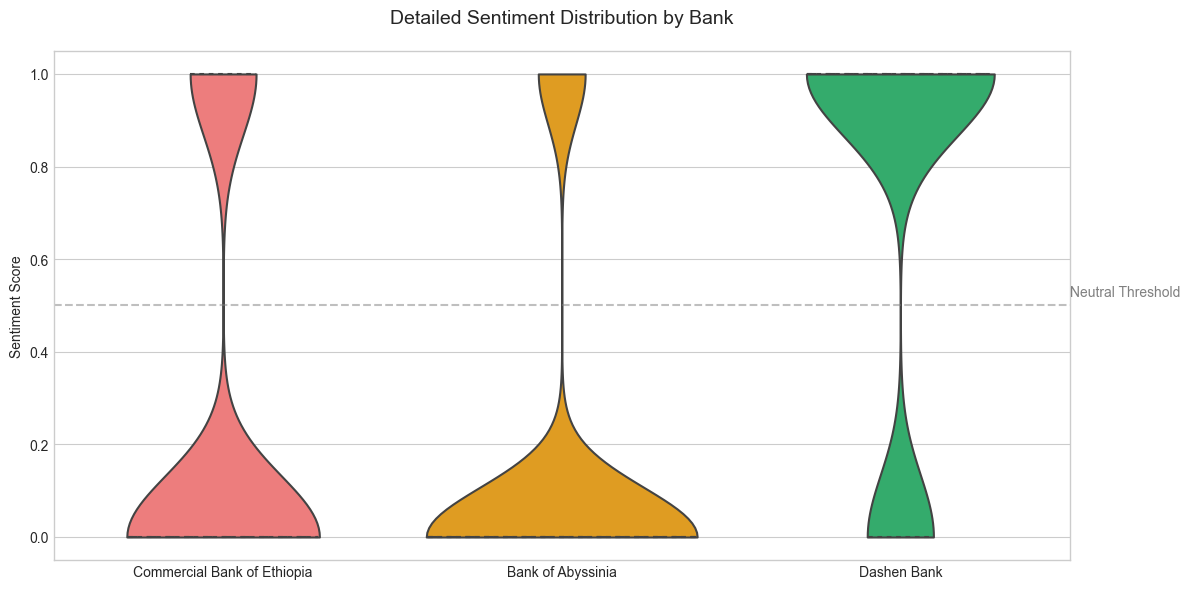

In [9]:
# Cell 4: Sentiment Distribution Violin Plot
plt.figure(figsize=(12,6))
sns.violinplot(data=sentiment_df, 
              x='bank', 
              y='sentiment_numeric',
              palette=['#ff6b6b', '#ffa502', '#20bf6b'],
              inner="quartile",
              cut=0)

plt.title('Detailed Sentiment Distribution by Bank', pad=20, fontsize=14)
plt.ylabel('Sentiment Score')
plt.xlabel('')
plt.axhline(0.5, color='gray', linestyle='--', alpha=0.5)
plt.text(2.5, 0.52, 'Neutral Threshold', color='gray')
plt.tight_layout()
plt.savefig('visualizations/sentiment_violin.png', dpi=300, bbox_inches='tight')
plt.show()

### Key Observations:
- Dashen Bank maintains consistently positive sentiment across all ratings
- Bank of Abyssinia shows extreme polarity - either very negative or very positive
- Commercial Bank has the most room for improvement in 3-star reviews